##### Exploratory Data Analysis (EDA) solving conflictsss

- 1 How does the distribution of startups vary across different states? (Location)
- 2 Which industry categories have the highest success rates among startups?? (Industries)
- 3 How does the total funding amount correlate with the success of startups? (Financial Backing)
- 4 Is there a correlation between the age of a startup and its success? (Maturity)
- 5 How do Relationships and Networking Impact Success? (Relationships)
- 6 How Does the Presence of Venture Capital Impact Success? (Venture Capital) - Finacing the startup with some risk

##### <span style="color: #add8e6;"> 1. Loading and Importing

In [1117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from datetime import datetime

In [1118]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook


In [1119]:
notebook_directory = 'data'
file_name = 'startup.csv'
file_path = os.path.join('..', 'data', 'startup.csv')
data_df = pd.read_csv(file_path, encoding="ISO-8859-1")

In [1120]:
data_df['status'] = data_df.status.map({'acquired':1, 'closed':0})
data_df.head(10)
data_df.rename(columns={'status':'is_acquired'}, inplace=True)
data_df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,1
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,0
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,0
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,1


Learn how to interpret and explain what did you do to select only the variables that are relevant

 ##### How does the distribution of startups vary across different states? (Location) check

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_16418/880223484.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_state["state_code"], y=df_state["funding_total_usd"], palette="Greens")


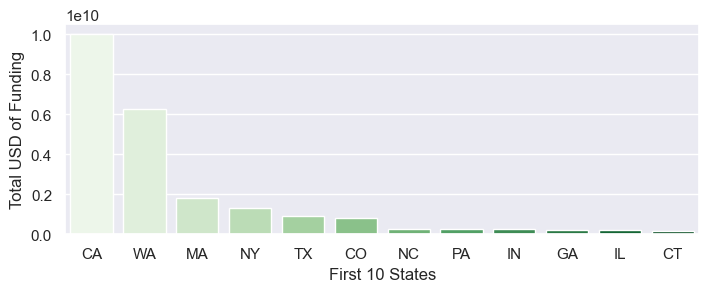

In [1121]:
df_state = data_df.groupby(["state_code"])["funding_total_usd"].sum().sort_values(ascending=False).reset_index().head(12)

plt.figure(figsize=(18, 6), dpi=100)
plt.subplot(2, 2, 1)
plt.ylabel("Total USD of Funding")
plt.xlabel("First 10 States")
sns.barplot(x=df_state["state_code"], y=df_state["funding_total_usd"], palette="Greens")
plt.show()

##### Which industry categories have the highest success rates among startups?? (Industries) check

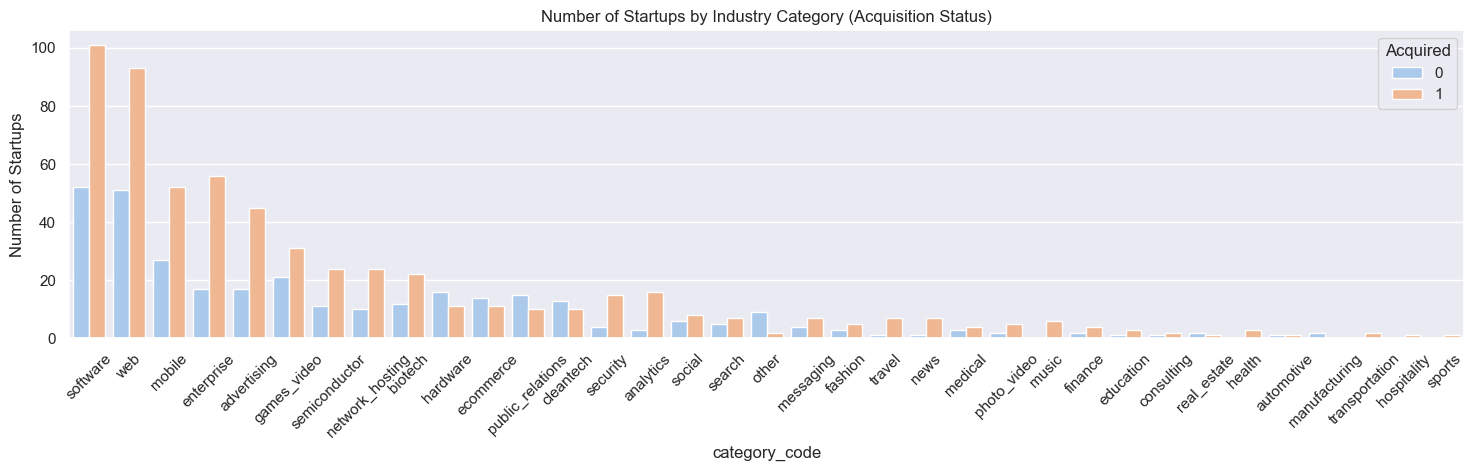

In [1122]:
import matplotlib.pyplot as plt
import seaborn as sns

order = data_df["category_code"].value_counts().index

plt.figure(figsize=(18, 4), dpi=100)
plt.xticks(rotation=45)
plt.title("Number of Startups by Industry Category (Acquisition Status)")

sns.countplot(x="category_code", data=data_df, order=order, palette="pastel", hue="is_acquired")
plt.ylabel("Number of Startups")
plt.legend(title="Acquired", loc="upper right")
plt.show()


There are two colors for the bars, indicating the acquisition status: 
- startups that have not been acquired (marked with a "0") and another color for those 
- that have been acquired (marked with a "1").

The software industry seems to have the highest number of startups, with a significant portion of them having been acquired. The web, mobile, and enterprise sectors also show a relatively large number of startups compared to other industries, with acquisitions in these categories as well.

The categories towards the right end of the chart, such as automotive, manufacturing, transportation, hospitality, and sports, show fewer startups and a very small number or no acquisitions.

In [1123]:
# Assuming you have a DataFrame called 'data'
count_acquired_closed = data_df['is_acquired'].value_counts()
# Print the count with labels
print(f'Acquired: {count_acquired_closed[1]}, Closed: {count_acquired_closed[0]}')

Acquired: 597, Closed: 326


##### <span style="color: #add8e6;"> 2. Cleaning the data 

**Drop the irrelevant features from 48 columns**

In [1124]:
data_df = data_df.drop(['Unnamed: 0','latitude','longitude','zip_code','id','Unnamed: 6','name','labels','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'], axis=1).copy()
data_df

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,...,advertising,0,0,1,0,0,0,6.0000,1,1
919,MA,Burlington,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,...,security,1,0,0,1,0,0,2.6667,1,0
920,CA,Sunnyvale,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,...,biotech,0,0,0,0,0,1,8.0000,1,0
921,CA,San Francisco,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,...,software,0,0,1,1,0,0,1.0000,1,1


In [1125]:
num_columns = len(data_df.columns)
print(f"After dropping irrelevant features The DataFrame has {num_columns} columns.")

After dropping irrelevant features The DataFrame has 24 columns.


In [1126]:
x= data_df.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
is_acquired                   0
dtype: int64

In [1127]:
# 2. Impute missing values with 0 to 'age_first_milestone_year'
data_df['age_first_milestone_year'].fillna(-1, inplace=True)
# 3. Impute missing values with 0 to 'age_last_milestone_year'
data_df['age_last_milestone_year'].fillna(-1, inplace=True)

**General Changes:*

- Imputed values for 'age_first_milestone_year' and 'age_last_milestone_year'.
- Handling Missing Values in 'closed_at': Missing values in 'closed_at' represent startups that are still open and will not be filled. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date.

In [1128]:
# Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]
print(last_closed_date)

10/1/2012


##### <span style="color: #add8e6;"> 3. Data Transformation

BEFORE

In [1129]:
# Sort DataFrame by 'closed_at' in ascending order
data_df = data_df.sort_values(by='closed_at', ascending=False)

# Display the first 10 rows
print(data_df.head(10))

    state_code           city founded_at  closed_at first_funding_at  \
899         NY       New York   9/1/2010   9/8/2013       12/20/2011   
741         CA  San Francisco   1/1/2011   9/6/2013        3/20/2012   
576         PA      Allentown   1/1/2000   9/6/2011        2/28/2005   
641         FL          Tampa   8/1/2006   9/4/2012         1/1/2007   
21          WA        Seattle   1/1/2004  9/28/2011       10/31/2007   
631         NY       New York   1/1/2009  9/27/2013       11/19/2010   
16          CA      Los Altos   1/1/2003  9/22/2012         8/2/2005   
150         GA        Atlanta   1/1/2002  9/20/2010        9/12/2007   
826         CA    Santa Clara   1/1/2004  9/18/2012        12/1/2007   
361         CA  San Francisco   8/1/2005  9/15/2012         3/6/2008   

    last_funding_at  age_first_funding_year  age_last_funding_year  \
899       2/18/2013                  1.3014                 2.4685   
741       3/20/2012                  1.2164                 1.2164 

In [1130]:
data_df.sort_index().head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,0
5,CA,Mountain View,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,...,network_hosting,0,0,0,1,0,0,3.0000,1,0
6,CA,Mountain View,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,...,software,1,0,1,1,0,0,1.6667,1,1
7,CA,San Rafael,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,...,finance,0,0,1,1,0,1,3.5000,1,1
8,MA,Williamstown,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,...,mobile,1,0,1,0,0,1,4.0000,1,1
9,CA,Palo Alto,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,...,web,1,1,1,0,0,0,1.0000,1,1


Converting Datetime to Numerical values

- Following variables : 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'

In [1131]:
# Assuming your_data_df is your main DataFrame
data_df = data_df

# List of date columns
date_columns = ['founded_at','closed_at', 'first_funding_at', 'last_funding_at']

# Convert date columns (objects) to datetime
for date_column in date_columns:
    data_df[date_column] = pd.to_datetime(data_df[date_column], errors='coerce')

# Sort DataFrame by 'closed_at' in descending order
data_df = data_df.sort_values(by='closed_at', ascending=False )

# Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]
print("Date of the last closed startup:", last_closed_date)

# Create a temporary variable 'closed_temp' with the non-null values of 'closed_at'
closed_temp = data_df['closed_at'].copy()

# Fill the null values in 'closed_temp' with the last closed date
closed_temp.fillna(last_closed_date, inplace=True)

# Calculate the relative age based on 'founded_at' and 'closed_temp'
data_df['age'] = ((closed_temp - data_df['founded_at']).dt.days / 365.25).round(4)

# Replace missing values in the original 'closed_at' with infinity
data_df['closed_at'].fillna(float('inf'), inplace=True)


Date of the last closed startup: 2013-10-30 00:00:00


/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_16418/4253783193.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'inf' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data_df['closed_at'].fillna(float('inf'), inplace=True)


In [1132]:
last_closed_date

Timestamp('2013-10-30 00:00:00')

To calculate age We fill column last_date with 2013-10-30 with assumption that is the last number of dataset

AFTER

In [1133]:
data_df.sort_index().head(10)


,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age
0,CA,San Diego,2007-01-01,inf,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.0000,0,1,6.8282
1,CA,Los Gatos,2000-01-01,inf,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.7500,1,1,13.8289
2,CA,San Diego,2009-03-18,inf,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.0000,1,1,4.6188
3,CA,Cupertino,2002-01-01,inf,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,...,0,0,0,1,1,1,3.3333,1,1,11.8275
4,CA,San Francisco,2010-08-01,2012-10-01 00:00:00,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,...,1,1,0,0,0,0,1.0000,1,0,2.1684
5,CA,Mountain View,2002-01-01,2009-02-15 00:00:00,2006-07-18,2006-07-18,4.5452,4.5452,5.0027,5.0027,...,0,0,0,1,0,0,3.0000,1,0,7.1239
6,CA,Mountain View,2005-01-01,inf,2006-09-21,2010-03-18,1.7205,5.2110,3.0000,6.6082,...,1,0,1,1,0,0,1.6667,1,1,8.8268
7,CA,San Rafael,2004-01-01,inf,2005-08-24,2010-10-04,1.6466,6.7616,5.6055,7.3616,...,0,0,1,1,0,1,3.5000,1,1,9.8289
8,MA,Williamstown,2002-01-01,inf,2005-08-02,2013-02-08,3.5863,11.1123,8.0055,9.9945,...,1,0,1,0,0,1,4.0000,1,1,11.8275
9,CA,Palo Alto,2005-06-01,inf,2007-02-01,2010-02-05,1.6712,4.6849,2.9178,6.1151,...,1,1,1,0,0,0,1.0000,1,1,8.4134


Converting categorical to Numerical values
- Following variables : 'state_code', 'city', 'category_code'

In [1134]:
# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code']

# Dictionary to store mappings
column_mappings = {}

# Create a function to generate mappings
def create_mapping(column):
    unique_values = data_df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    data_df[column] = data_df[column].map(mapping)
    # Save mapping in the dictionary
    column_mappings[column] = mapping

# Now, column_mappings contains the desired dictionary structure
print(column_mappings)

{'state_code': {'CA': 0, 'NY': 1, 'IL': 2, 'MI': 3, 'NJ': 4, 'OH': 5, 'CT': 6, 'DC': 7, 'WA': 8, 'PA': 9, 'TX': 10, 'ID': 11, 'ME': 12, 'MA': 13, 'TN': 14, 'VA': 15, 'NC': 16, 'MN': 17, 'GA': 18, 'CO': 19, 'FL': 20, 'MD': 21, 'WI': 22, 'AR': 23, 'IN': 24, 'UT': 25, 'AZ': 26, 'KY': 27, 'NM': 28, 'NH': 29, 'RI': 30, 'OR': 31, 'NV': 32, 'MO': 33, 'WV': 34}, 'city': {'Mountain View': 0, 'San Diego': 1, 'New York': 2, 'San Francisco': 3, 'Chicago': 4, 'Bingham Farms': 5, 'Hillsborough': 6, 'Cincinnati': 7, 'Yorba Linda': 8, 'Westport': 9, 'Washington': 10, 'Seattle': 11, 'Philadelphia': 12, 'San Jose': 13, 'Fremont': 14, 'Evanston': 15, 'Austin': 16, 'Beverly Hills': 17, 'Idaho Falls': 18, 'South San Francisco': 19, 'Pittsburgh': 20, 'West Newfield': 21, 'NY': 22, 'Burlington': 23, 'Red Bank': 24, 'Palo Alto': 25, 'Memphis': 26, 'Champaign': 27, 'San Mateo': 28, 'Waltham': 29, 'Viena': 30, 'NYC': 31, 'Canton': 32, 'Cambridge': 33, 'Andover': 34, 'Raleigh': 35, 'Oakland': 36, 'Saint Paul': 3

In [1135]:
data_df.sort_index().head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age
0,0,1,2007-01-01,inf,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.0000,0,1,6.8282
1,0,62,2000-01-01,inf,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.7500,1,1,13.8289
2,0,1,2009-03-18,inf,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.0000,1,1,4.6188
3,0,145,2002-01-01,inf,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,...,0,0,0,1,1,1,3.3333,1,1,11.8275
4,0,3,2010-08-01,2012-10-01 00:00:00,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,...,1,1,0,0,0,0,1.0000,1,0,2.1684
5,0,0,2002-01-01,2009-02-15 00:00:00,2006-07-18,2006-07-18,4.5452,4.5452,5.0027,5.0027,...,0,0,0,1,0,0,3.0000,1,0,7.1239
6,0,0,2005-01-01,inf,2006-09-21,2010-03-18,1.7205,5.2110,3.0000,6.6082,...,1,0,1,1,0,0,1.6667,1,1,8.8268
7,0,146,2004-01-01,inf,2005-08-24,2010-10-04,1.6466,6.7616,5.6055,7.3616,...,0,0,1,1,0,1,3.5000,1,1,9.8289
8,13,147,2002-01-01,inf,2005-08-02,2013-02-08,3.5863,11.1123,8.0055,9.9945,...,1,0,1,0,0,1,4.0000,1,1,11.8275
9,0,25,2005-06-01,inf,2007-02-01,2010-02-05,1.6712,4.6849,2.9178,6.1151,...,1,1,1,0,0,0,1.0000,1,1,8.4134


In [1136]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
column_name = 'founded_at'

# Use the dtype attribute to get the type of the column
column_type = data_df[column_name].dtype

# Print the type
print("Type of '{0}': {1}".format(column_name, column_type))

Type of 'founded_at': datetime64[ns]


In [1137]:
numerical_features = data_df.select_dtypes(include=['number']).columns.tolist()
categorical_features = data_df.select_dtypes(include=['object']).columns.tolist()
datetime_features = data_df.select_dtypes(include=['datetime']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['is_acquired']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nDatetime Features ({0}):".format(len(datetime_features)))
print(datetime_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (21):
['state_code', 'city', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'is_acquired', 'age']

Categorical Features (1):
['closed_at']

Datetime Features (3):
['founded_at', 'first_funding_at', 'last_funding_at']

Target Variable (1):
['is_acquired']


In [1138]:
# #I dont need them because i already used them to calculate age (Avoid Multicollinearity)
# # Assuming 'data_df' is your DataFrame
# data_df = data_df.drop(['founded_at', 'closed_at'], axis=1)

 ##### <span style="color: #add8e6;"> 4. Correlation between variables with categorical values 

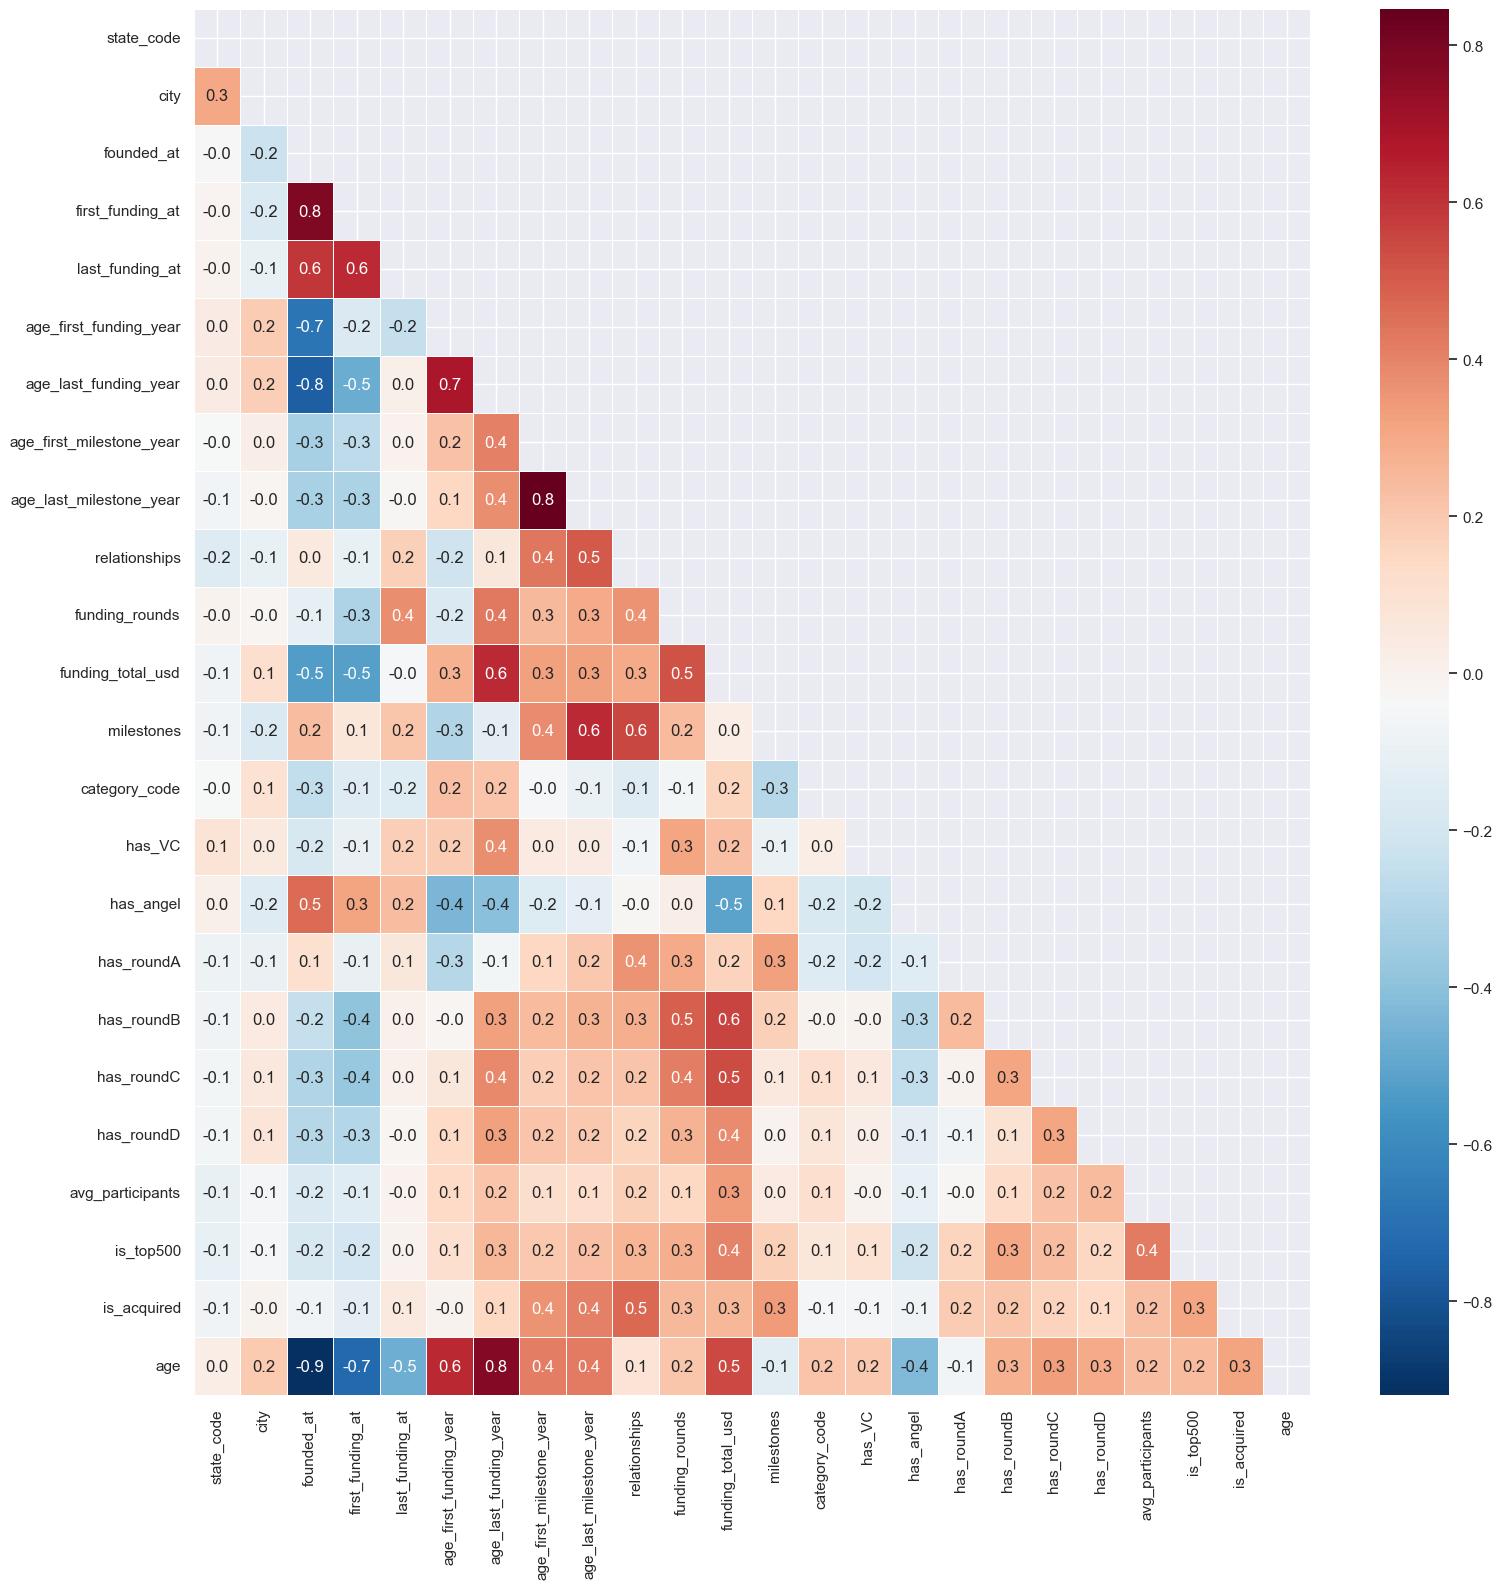

In [1139]:
def draw_heatmap(data_df):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = data_df.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','datetime']
numerical_df_1 = data_df.select_dtypes(numerics)

draw_heatmap(numerical_df_1)

- Relationships (0.5):

Interpretation: A moderate positive correlation indicates that companies with more relationships tend to align positively with the target. This suggests the importance of networking and connections.
Assumption: Strong networks could offer better resource access, benefiting the target outcome.
- Age Last Milestone Year (0.4):

Interpretation: Companies achieving milestones later in their lifecycle show a moderate correlation with the target, hinting at the value of sustained growth and long-term strategies.
Assumption: Maturity and persistence might be key factors influencing the target.
- Age First Milestone Year (0.4):

Interpretation: Early achievement of milestones correlates moderately with the target, indicating early success or potential as significant.
Assumption: Early milestones could reflect innovation or effective initial strategies.
- Founding Rounds (0.3):

Interpretation: A slight positive correlation suggests that more funding rounds might slightly influence the target, possibly indicating investor confidence or market validation.
Assumption: Repeated funding could signal a company's resilience and growth potential.
- Funding Total USD (0.3):

Interpretation: The total funding amount has a weak positive relationship with the target, suggesting that higher funding can be beneficial but is not a decisive factor.
Assumption: While important, funding alone is not the sole determinant of the target outcome.


In our analysis, we noted significant correlations between features such as first_funding_at and founded_at. Given the robustness of the Random Forest model against multicollinearity, these correlations present less concern for our analysis. While acknowledging these correlations for comprehensive data understanding, we retain these features in our model. This approach leverages Random Forest's strengths while ensuring a nuanced interpretation of our dataset.


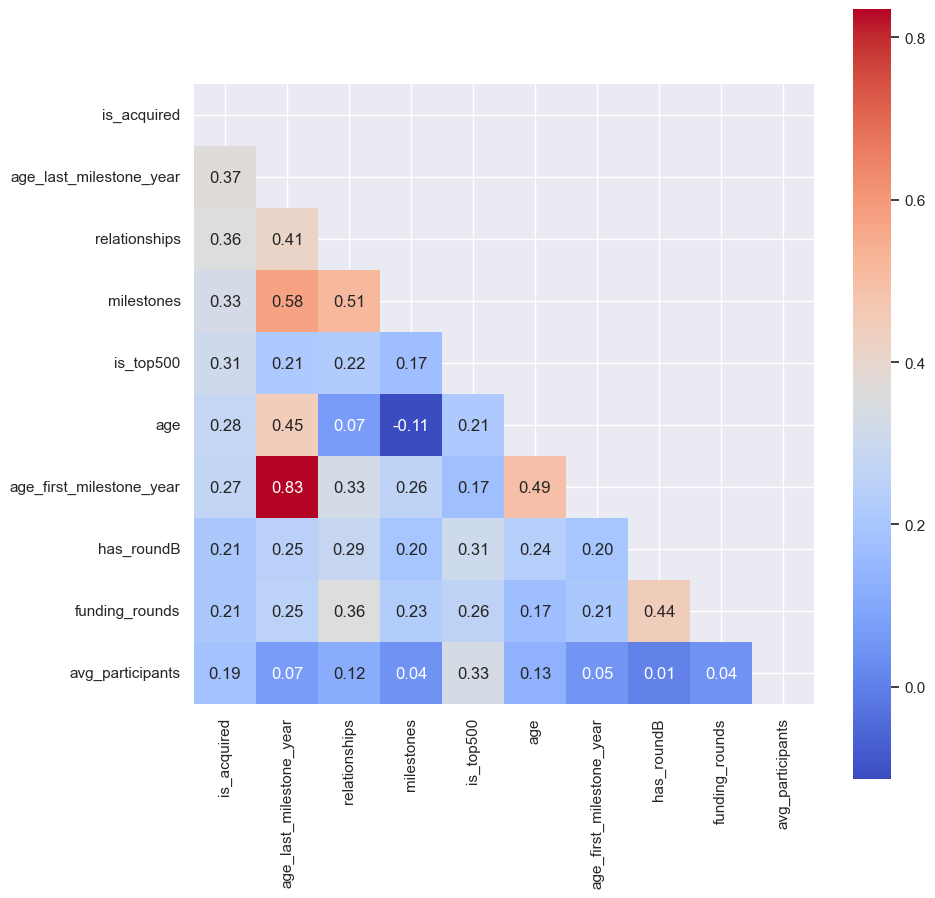

In [1140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_df' is your existing DataFrame and 'is_acquired' is your target variable

# Select all columns, including datetime
cols = data_df.columns

# Calculate the correlation of the numerical features with the target variable
numeric_cols = data_df.select_dtypes(include=[np.number])
cols = numeric_cols.corr().nlargest(10, 'is_acquired')['is_acquired'].index

# Compute the correlation matrix for the selected features
cm = np.corrcoef(data_df[cols].values.T)

# Create a mask to hide the lower triangle (including the diagonal)
mask = np.triu(np.ones_like(cm, dtype=bool))

# Plot the heatmap with the mask
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'fontsize': 12}, mask=mask, cmap='coolwarm', yticklabels=cols.values, xticklabels=cols.values)
plt.show()


##### How do Relationships and Networking Impact Success? (Relationships)**

In [1141]:
data_df['funding_total_usd'].max()

5700000000

In [1142]:
data_df['funding_total_usd'].min()

11000

#####  How does the total funding amount correlate with the success of startups? (Financial Backing) check

##### Is there a correlation between the age('founded_at - closed_at) of a startup and its success(is_acquire)? (Maturity)** need to add variable age 

In [1143]:
print(data_df['is_acquired'].head(10))

609    0
633    0
631    0
899    0
741    0
139    0
114    0
23     0
107    0
235    0
Name: is_acquired, dtype: int64


KeyError: 'age_first_funding_year'

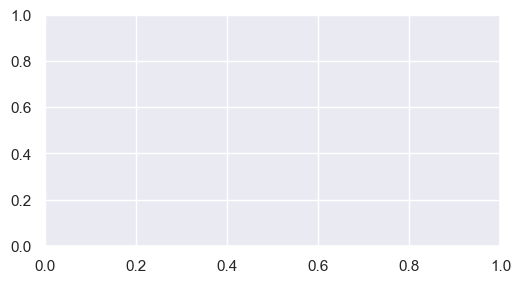

In [1144]:
plt.figure(figsize=(20,3),dpi=100)
plt.subplot(1,3,1)
sns.scatterplot(df["age_first_funding_year"],df["age_last_funding_year"], label="first&last funding", palette="Greens")
sns.scatterplot(df["age_first_milestone_year"], df["age_last_milestone_year"], label="first&last milestone", palette="Blues")
plt.legend()